# Text Summarization in Python

 https://github.com/mishraji-8097/Extractive-Text-Summarization

## Approach: 
Extractive text summarization is all about finding the more important sentences from a document as a summary of that document.
Use the TextRank algorithm to find these 'important' sentences.

## Implementation

### 1. Importing important libraries

In [4]:
# PyPDF2 is a library used for reading the PDF files
# docx2txt is the library used for reading Word documents 
import numpy as np
import PyPDF2
import docx2txt
import sys

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [6]:
# networkx library helps in working with graphs ...
# and later performing the PageRank algorithm ...
# which is the crux of this implementation to find ...
# the importance of each sentence using their 'rank' as a metric ...
# rank, the output of the method textrank, is a measure of importance of sentences
# this library has been used in the cell no. ()

import networkx as nx

In [7]:
# the PunktSentenceTokenizer library is being imported from the file punkt.py contained in package nltk.tokenize 
# this is used to tokenize the document into sentences

# Tokenization: Tokenization is the process of demarcating and possibly classifying.. 
# sections of a string of input characters. 
# The resulting tokens are then passed on to some other form of processing. 

from nltk.tokenize.punkt import PunktSentenceTokenizer

In [8]:
# TfidfTransformer and CountVectorizer libraries are being imported

# CountVectorizer: In this implementation, a CountVectorizer object is being created that ..
# will be used for creating the document-term matrix

# tFidTransformer: In this implementation,TfidfTransformer is used for executing the method fit_transform()... 
# which provides the output as a document-term matrix normalized (value 0-1) according to the TF-IDF
# TF(Term Frequency): the no. of times a term(a word here) appears in the current document(single sentence here)
# IDF(Inverse Document Frequency): the no. of times a term(a word here) appears in the entire corpus
# Corpus: set of all sentences


from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

### 2.  Function to read the document from user
Supported formats: .txt, .pdf 

Input: Takes the name of the file as input. 

Output: Returns a string output containing the contents of the file.

In [9]:
# we are going to show an example of how the method is working
# first let's take the document as an input
def readDoc(name):
    #name = input('Please input a file name: ') 
    #print('You have asked for the document %s'%name)

    # now read the type of document
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        # print(name)
    #print(choice)
    # Case 1: if it is a .txt file
        
    if choice == 1:
        f = open(name, 'r' )
        document = f.read()      
        f.close()
            
    # Case 2: if it is a .pdf file
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document

### 3. Function to tokenize the document
Input: String of text document

Output: A list containing sentences as its elements

### 4. Read the document

In [10]:
 

# reading a file and 
# printing the size of the file

document = readDoc('list_desc.txt')
#split document into paragraph by '\n'
paragraph = document.splitlines()
print('The length of the file is: %d'%len(document))
print('The num of the paragraph is: %d'%len(paragraph))


<class 'str'>
The length of the file is: 5768761
The num of the paragraph is: 5423


In [11]:
for i in paragraph :
    i = i.strip()

In [12]:
document= document.strip() #decode('utf-8')

In [13]:
print(document [:2000])

With a stay at Petpimarn Boutique Resort in Bangkok (Chatuchak)  you'll be within a 15-minute drive of Kasetsart University and IMPACT Arena. This hotel is 9.7 mi (15.6 km) from Temple of the Emerald Buddha and 10 mi (16.2 km) from Wat Arun.   Make yourself at home in one of the 89 air-conditioned rooms featuring refrigerators. Complimentary wireless Internet access keeps you connected  and digital programming is available for your entertainment. Bathrooms have showers and complimentary toiletries. Conveniences include desks and complimentary bottled water  and housekeeping is provided daily.   Make use of convenient amenities  which include complimentary wireless Internet access and tour/ticket assistance.   At Petpimarn Boutique Resort  enjoy a satisfying meal at the restaurant. English breakfasts are available daily from 6:30 AM to 10 AM for a fee.   Featured amenities include dry cleaning/laundry services  a 24-hour front desk  and luggage storage. Free self parking is available on

In [14]:
paragraph[:100]

["With a stay at Petpimarn Boutique Resort in Bangkok (Chatuchak)  you'll be within a 15-minute drive of Kasetsart University and IMPACT Arena. This hotel is 9.7 mi (15.6 km) from Temple of the Emerald Buddha and 10 mi (16.2 km) from Wat Arun.   Make yourself at home in one of the 89 air-conditioned rooms featuring refrigerators. Complimentary wireless Internet access keeps you connected  and digital programming is available for your entertainment. Bathrooms have showers and complimentary toiletries. Conveniences include desks and complimentary bottled water  and housekeeping is provided daily.   Make use of convenient amenities  which include complimentary wireless Internet access and tour/ticket assistance.   At Petpimarn Boutique Resort  enjoy a satisfying meal at the restaurant. English breakfasts are available daily from 6:30 AM to 10 AM for a fee.   Featured amenities include dry cleaning/laundry services  a 24-hour front desk  and luggage storage. Free self parking is available 

### 5. Generate a list of sentences in the document

In [18]:
import spacy
import re
nlp = spacy.load('en')
nlp.max_length = 6000000
#text = u'This is first sentence.Next is numbered list.  Hello World!  Hello World2  Hello World!'
#doc = nlp(text)
#for sentence in doc.sents:
#    print(sentence.text)

In [23]:
# we want to tokenize the document for further processing
# tokenizing the sentence means that we are creating a list of all the sentences of the document.
# Need of tokenizing the document: Initially the document is in just a string format.
# if we want to process the document, we need to store it in a data structure.
# Tokenization of document into words is also possible, but we will go with the tokenizing with the sentences
# Since we want to choose the most relevant sentences, we need to generate tokens of sentences only

import tqdm

from nltk import sent_tokenize
 
sentences_list= sent_tokenize(document)
paragraph_break = []
for item in tqdm.tqdm(paragraph):
    doc = nlp(item)
    
    sentences_list =  [sentence.text.strip() for sentence in doc.sents]
    if (len(sentences_list) ) == 0:
        continue
    paragraph_break.append(sentences_list)
     

# let us print the size of memory used by the list sentences
print('The size of the list in Bytes is: %d'% sys.getsizeof(sentences_list))

# the size of one of the element of the list
print('The size of the item 0 in Bytes is: %d'%(sys.getsizeof(sentences_list[0])))

100%|██████████| 5423/5423 [02:14<00:00, 40.33it/s]

The size of the list in Bytes is: 192
The size of the item 0 in Bytes is: 128


In [24]:
# let us see the data type of sentences_list
# It will be list
paragraph_break[-5:len(paragraph_break)]

[['Krabi Boat Lagoon Resort is located in area / city Khlong Khamao.',
  'The resort has a very good location  also near the Krabi Airport (KBV)  which is only 10.02 km away.',
  'There are plenty of tourist attractions nearby  such as Had Yao within 4.36 km  and Thara Park within 6.67 km.',
  'Krabi Boat Lagoon Resort is highly recommended for backpackers who want to get an affordable stay yet comfortable at the same time.',
  'For you  travelers who wish to travel comfortably on a budget',
  'Krabi Boat Lagoon Resort is the perfect place to stay that provides decent facilities as well as great services.',
  'This resort is the perfect choice for couples seeking a romantic getaway or a honeymoon retreat.',
  'Enjoy the most memorable nights with your loved one by staying at Krabi Boat Lagoon Resort.',
  'Have fun with various entertaining facilities for you and the whole family at Krabi Boat',
  'Lagoon Resort',
  'a wonderful accommodation for your family holiday.',
  'While travelin

In [25]:
paragraph_break2 = [ sentences_list for sentences_list in paragraph_break if len(sentences_list) > 0]

In [26]:
print(len(paragraph_break2))

5295


In [27]:
paragraph_break = paragraph_break

In [28]:
# let us analyse the elements of the sentences
# len() method applies on the list and provides the number of elements in the list
print('The size of the list "paragraph" is: {}'.format(len(paragraph_break)))

The size of the list "paragraph" is: 5295


# print the elements of the list
# If the input document is long, which on realistically will be wrong, we would not like to print the entire document
for i in paragraph_list:
    print(i)

### 6. Generate term-document matrix (TD matrix) of the data 

In [29]:
# Convert a collection of text documents to a matrix of token counts
# fit_transform method of CountVectorizer() class 
# Learn the vocabulary dictionary and return term-document matrix. 
# I/p: An iterable which yields either str, unicode or file objects.
# O/p: The term-document matrix named cv_matrix

cv_list = []
cv_matrix_list = []
for i, sentences_list in  enumerate(paragraph_break):
       
    #print(i,sentences_list)
     
    cv = CountVectorizer()
    cv_list.append(cv )
    cv_matrix_list.append(cv.fit_transform(sentences_list))
print(len(cv_matrix_list))

5295


**So what does CountVectorizer.fit_transform() do?**

In [175]:
# a demo of what CountVectorizer().fit_transform(text) does
cv_demo = CountVectorizer() # a demo object of class CountVectorizer

# I have repeated the words to make a non-ambiguous array of the document text matrix 

text_demo = ["Ashish is good, you are bad", "I am not bad"] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))

# Result is 2-d matrix containing document text matrix
# Notice that in the second row, there is 2.
# also, bad is repeated twice in that sentence.
# so we can infer that 2 is corresponding to the word 'bad'
print('Feature list: {}'.format(cv_demo.get_feature_names()))

Result demo array is [[0 1 1 1 1 1 0 1]
 [1 0 0 1 0 0 1 0]]
Feature list: [u'am', u'are', u'ashish', u'bad', u'good', u'is', u'not', u'you']


In [30]:
# printing the cv_matrix type
# and how it is being stored in memory?
# it is stored in the compressed row format
# compressed row format: 

print('The data type of bow matrix {}'.format(type(cv_matrix_list[1])))
print('Shape of the matrix {}'.format(cv_matrix_list[1].get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix_list[1])))
print(cv_list[1].get_feature_names())
print(cv_matrix_list[1].toarray())

The data type of bow matrix <class 'scipy.sparse.csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <16x131 sparse matrix of type '<class 'numpy.int64'>'
	with 203 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 56
['18', '24', '67', '85', 'accommodate', 'airport', 'all', 'also', 'always', 'an', 'and', 'any', 'are', 'area', 'areas', 'as', 'ask', 'assistance', 'at', 'attractions', 'available', 'away', 'bangkok', 'best', 'center', 'central', 'check', 'city', 'complain', 'connected', 'cuisines', 'day', 'deal', 'desire', 'desk', 'dishes', 'dmk', 'do', 'don', 'during', 'enjoyable', 'exclusively', 'facilities', 'family', 'favorite', 'finest', 'fitness', 'for', 'friends', 'from', 'front', 'get', 'good', 'has', 'have', 'help', 'here', 'hesitate', 'hotel', 'hours', 'in', 'international', 'is', 'it', 'km', 'located', 'location', 'loved', 'make', 'more', 'muang', 'mueang', 'must', 'near', 'nearby', 'need', 'not', 'nothing', 'of', 'offered', 'ones', '

In [31]:
# Tnormalized: document-term matrix normalized (value 0-1) according to the TF-IDF
# TF(Term Frequency): the no. of times a term(a word here) appears in the current document(single sentence here)
# IDF(Inverse Document Frequency): the no. of times a term(a word here) appears in the entire corpus
# Corpus: set of all sentences
normal_matrix_list = []
for cv_matrix in cv_matrix_list:
    normal_matrix =TfidfTransformer().fit_transform(cv_matrix)
    normal_matrix_list.append( normal_matrix)
    #print(normal_matrix.toarray())
print(len(normal_matrix_list))

5295


In [32]:
print(normal_matrix_list[1].T.toarray)
res_graph = normal_matrix_list[1] * normal_matrix_list[1].T
# plt.spy(res_graph)

<bound method _cs_matrix.toarray of <131x16 sparse matrix of type '<class 'numpy.float64'>'
	with 203 stored elements in Compressed Sparse Column format>>


In [33]:
res_graph_list = []
for normal_matrix in normal_matrix_list:
    res_graph = normal_matrix * normal_matrix.T
    res_graph_list.append(res_graph)
print(len(res_graph_list))

5295


Number of edges 95
Number of vertices 16


/home/chantana/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


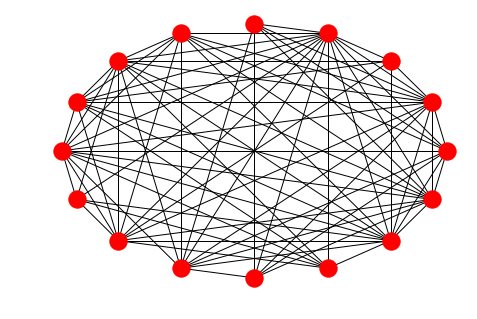

The memory used by the graph in Bytes is: 56


In [34]:
# drawing a graph to proceed for the textrank algorithm
# nx_graph is a graph developed using the networkx library
# each node represents a sentence
# an edge represents that they have words in common
# the edge weight is the number of words that are common in both of the sentences(nodes)
# nx.draw() method is used to draw the graph created

nx_graph = nx.from_scipy_sparse_matrix(res_graph_list[1])
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

In [35]:
nx_graph_list = []
for res_graph in res_graph_list:
    nx_graph = nx.from_scipy_sparse_matrix(res_graph)
    nx_graph_list.append(nx_graph)
print(len(nx_graph_list)) 

5295


In [22]:
#  note that the graph above is dense and therefor it resembles a circle
# if a shorter document is taken, a beautiful circular graph can be seen 

### 8. Getting the rank of every sentence using textrank

In [36]:
# ranks is a dictionary with key=node(sentences) and value=textrank (the rank of each of the sentences)
ranks_list = []
print(len(nx_graph_list) )
from tqdm import   tqdm_notebook
for nx_graph in   tqdm_notebook( nx_graph_list) :
    ranks = nx.pagerank(nx_graph)
    ranks_list.append(ranks)
    # analyse the data type of ranks
    #print(type(ranks))
    #print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

    # print the dictionary
    #for i in ranks:
        #print(i, ranks[i])

print(len(ranks_list))

5295



5295


In [229]:
ranks_list[:2]

[{0: 0.09508349639828222,
  1: 0.09116329056926128,
  2: 0.0867127100459239,
  3: 0.1041747395691481,
  4: 0.08476426555223127,
  5: 0.1003513127292987,
  6: 0.10194578713101712,
  7: 0.08763533019200317,
  8: 0.08427814982486695,
  9: 0.08159039768573373,
  10: 0.08230052030223337},
 {0: 0.08862450535514454,
  1: 0.07254727206726426,
  2: 0.0610293329360216,
  3: 0.09256691609714415,
  4: 0.06721453437631048,
  5: 0.06634013691515034,
  6: 0.0660360553756567,
  7: 0.07248012401521348,
  8: 0.07051617820604861,
  9: 0.089134630805778,
  10: 0.08657294856746459,
  11: 0.07205968504140456,
  12: 0.09487768024139841}]

### 9. Finding important sentences and generating summary

In [37]:
# enumerate method: returns an enumerate object
# Use of list Comprehensions
# O/p: sentence_array is the sorted(descending order w.r.t. score value) 2-d array of ranks[sentence] and sentence 
# For example, if there are two sentences: S1 (with a score of S1 = s1) and S2 with score s2, with s2>s1
# then sentence_array is [[s2, S2], [s1, S1]]
sentence_array_list = []
from tqdm import tqdm_notebook
print(len(paragraph_break),len(ranks_list))
for   sentences_list,ranks in tqdm.tqdm_notebook(zip(paragraph_break,ranks_list)) :
    #print(len(sentences_list))
    #print(ranks)
    #enumerate(sentences_list)
    #print(ranks_list[j])
    #array = ()
    #for i, s in enumerate(sentences_list):
    #    ranks =ranks_list[j]
    #    array += ((ranks[i], s),)
        
    #sentence_array = sorted(array,reverse=True)
    sentence_array = sorted(((ranks [i], s) for i, s in enumerate(sentences_list)), reverse=True)
    sentence_array = np.asarray(sentence_array)
    sentence_array_list.append(sentence_array)
    #print(sentence_array)
print(len(sentence_array_list))

5295 5295



5295


In [38]:
# as sentence_array is in descending order wrt score value
# fmax is the largest score value(the score of first element)
# fmin is the smallest score value(the score of last element)
rank_max_min_list = []
for sentence_array in sentence_array_list:
    #print(sentence_array[0][0])    
    rank_max = float(sentence_array[0][0])
    rank_min = float(sentence_array[len(sentence_array) - 1][0])
    rank_max_min_list.append((rank_max,rank_min))
print(len(rank_max_min_list))

5295


In [39]:
# print the largest and smallest value of scores of the sentence
print(rank_max_min_list[2][0])
print(rank_max_min_list[2][1])

0.09037058322043834
0.06907384826006524


In [40]:
# Normalization of the scores
# so that it comes out in the range 0-1
# fmax becomes 1
# fmin becomes 0
# store the normalized values in the list temp_array
temp_array_list = []
print(len(sentence_array_list),len(rank_max_min_list))
for sentence_array, rank_max_min  in tqdm.tqdm_notebook(zip(sentence_array_list,rank_max_min_list)):
    
    temp_array = []
    rank_max = rank_max_min[0]
    rank_min = rank_max_min[1]
    # if all sentences have equal ranks, means they are all the same
    # taking any sentence will give the summary, say the first sentence
    flag = 0
    if rank_max - rank_min == 0:
        temp_array.append(0)
        flag = 1

    # If the sentence has different ranks
    if flag != 1:
        for i in range(0, len(sentence_array)):
            temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

    #print(len(temp_array))
    temp_array_list.append(temp_array)

print(len(temp_array_list))

5295 5295



5295


In [41]:
# Calculation of threshold:
# We take the mean value of normalized scores
# any sentence with the normalized score 0.2 more than the mean value is considered to be 
threshold_list = []
for temp_array in temp_array_list:
    threshold = (sum(temp_array) / len(temp_array)) + 0.2
    threshold_list.append(threshold)
print(len(threshold_list))

5295


In [42]:
# Separate out the sentences that satiasfy the criteria of having a score above the threshold
sentence_list_2 = []
for temp_array, sentence_array, threshold in zip(temp_array_list,sentence_array_list,threshold_list):
    
    sentence_list = []
    if len(temp_array) > 1:
        for i in range(0, len(temp_array)):
            if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
    else:
        sentence_list.append(sentence_array[0][1])
    sentence_list_2.append(sentence_list)
print(len(sentence_list_2))

5295


In [43]:
#model = sentence_list

### 10. Writing the summary to a new file

In [44]:
 
with open("summary_desc.txt","w") as fileout:
    for j, sentence_list in  enumerate(sentence_list_2) :
        #print(j,sentence_list)
        summary = " ".join(str(x.encode('utf-8').strip())  for x in sentence_list)
        #print(j, summary)
        fileout.write(summary)
        fileout.write("\n")

fileout.close()

In [ ]:
!head 

# End of the notebook

Please feel free to contribue for any improvements.